# Assignment 1 - Edmund Car Reviews - Notebook 2 (Task A)

**Team Members - MSBA '24 Morning Cohort:**
- Karthick Vel Kathirvel (kk37347)
- Sharan Arora (sa44827)
- Spandan Pal (sp54969)
- Manideep Telukuntla (mt39528)
- Pritesh Singh (ps35762)
- Raghav Vaidya (rv25256)


Task A: Once you fetch the data, test if the data support Zipf’s law econometrically. Additionally plot the
most common 100 words in the data against the theoretical prediction of the law. For this question, do
not remove stopwords. Also do not perform stemming or lemmatization.
Check http://www.garysieling.com/blog/exploring-zipfs-law-with-python-nltk-scipy-and-matplotlib
(Note that the above link does NOT test Zipf’s law econometrically)

In [2]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore")

In [3]:
commentsDataTotal = pd.read_csv(r"DiscussionData.csv")
# Drop NaN values
commentsDataTotal = commentsDataTotal.dropna(subset=['Text'])
commentsDataTotal['Time'] = pd.to_datetime(commentsDataTotal['Time'])
sortedCommentsData = commentsDataTotal.sort_values(by='Time', ascending=False)

# Filter to include only the latest 6000 posts
commentsScraped = sortedCommentsData.head(6000)

In [4]:
from collections import Counter

def wordCounter(message):
  words = str(message).lower().split()
  words_count = Counter(words)
  return words_count

commentsScraped["Word Count"] = commentsScraped["Text"].apply(wordCounter)

In [5]:
#Compile all words. Right now we are considering brand names multiple times if they occur in the message more than once.
total_word_count = {}
for word_dict in commentsScraped["Word Count"]:
  for key, value in word_dict.items():
    if key not in total_word_count:
      total_word_count[key] = value
    else:
      total_word_count[key] += value

***
At first, if we plot the distribution of  ***log(rank) - log(frequency)***, we observe the following
***

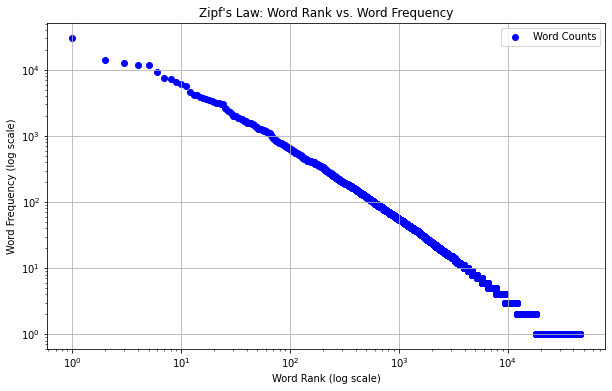

In [6]:
import matplotlib.pyplot as plt

# Sort the word counts in descending order
sorted_word_count = dict(sorted(total_word_count.items(), key=lambda item: item[1], reverse=True))

# Create a list of word ranks and word frequencies
word_ranks = list(range(1, len(sorted_word_count) + 1))
word_frequencies = list(sorted_word_count.values())

# Create a scatterplot on a log-log scale
plt.figure(figsize=(10, 6))
plt.scatter(word_ranks, word_frequencies, color='b', label='Word Counts')
plt.xscale('log')
plt.yscale('log')
plt.title("Zipf's Law: Word Rank vs. Word Frequency")
plt.xlabel("Word Rank (log scale)")
plt.ylabel("Word Frequency (log scale)")
plt.legend()
plt.grid(True)
plt.show()

***
Visually, the **rank - frequencency** distribution and the **log(rank) - log(frequency)** does have a nature similar to the distribution expected from *Zipf's Law*

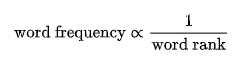

Now to statistically prove this, we can check if the slope of the expected value for the log(rank)-log(frequency) is **close to -1.**
***

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(np.log(word_ranks).reshape(-1,1), np.log(word_frequencies))
predictions = model.predict(np.log(word_ranks).reshape(-1,1))

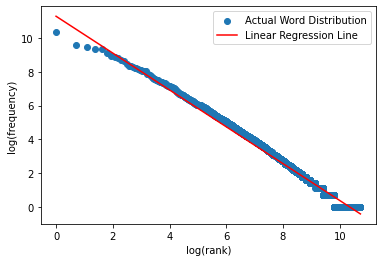

In [8]:
plt.scatter(np.log(word_ranks).reshape(-1,1), np.log(word_frequencies), label='Actual Word Distribution')
plt.plot(np.log(word_ranks).reshape(-1,1), predictions, color='red', label='Linear Regression Line')
plt.ylabel('log(frequency)')
plt.xlabel('log(rank)')
plt.legend()
plt.show()

In [9]:
slope = model.coef_[0]

print("The slope of the log(rank) vs log(frequency) distribution is" ,slope)

The slope of the log(rank) vs log(frequency) distribution is -1.0909643002200564


As the slope of the log(rank) vs log(frequency) distribution is **close to -1**, we can say that this word distribution from the car discussion forum **follows** ***Zipf's Law.***

Now, if we try to plot the 100 most common words against the theoretical prediction of the law.

In [10]:
token_100_df  = pd.DataFrame({'rank': word_ranks[0:100], 'count': word_frequencies[0:100]})

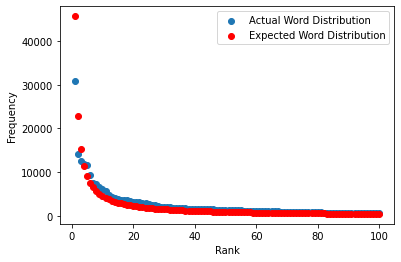

In [11]:
import matplotlib.pyplot as plt
import numpy as np


plt.scatter(token_100_df['rank'], token_100_df['count'],label='Actual Word Distribution')
plt.scatter(token_100_df['rank'], (word_ranks[-1] * word_frequencies[-1])/token_100_df['rank']  ,color='red',label='Expected Word Distribution')
plt.ylabel('Frequency')
plt.xlabel('Rank')
plt.legend()
plt.show()